In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ANKITHA\Downloads/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
df=df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Data Preprocessing

# Split the data

In [10]:
X=df[['age','sex','bmi','children','smoker','region']]
y=df[['charges']]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1002, 6) (1002, 1)
(335, 6) (335, 1)


# separate Numerical and categorical features

In [12]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_num=X_train.select_dtypes(include=['int64','float64'])

In [13]:
#Rescaling numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed=pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns=scaler.get_feature_names_out(),
                                    index=X_train_num.index)
X_train_num_transformed.head()

,age,bmi,children
1075,-0.515609,-0.200981,-0.073709
131,1.539050,-1.435875,-0.894334
15,-1.436663,-1.017156,-0.073709
825,1.751601,0.164581,0.746916
1137,-0.940711,-1.404799,-0.894334


# Testing

In [14]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_num=X_test.select_dtypes(include=['int64','float64'])

In [15]:
X_test_num_transformed=pd.DataFrame(scaler.transform(X_test_num),
                                   columns=X_test_num.columns,
                                   index=X_test_num.index)
X_test_num_transformed.head()

,age,bmi,children
1248,-1.507514,1.472261,-0.894334
610,0.547145,-0.236964,-0.073709
393,0.688846,0.086889,-0.073709
503,-1.436663,-0.093030,-0.894334
198,0.830547,-2.088489,-0.894334


# Feature Engineering: Applying One-Hot Encoding on Categorical Features

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (1002, 3)
Shape of Data after Transformation: (1002, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1075,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
131,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
825,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1137,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Testing

In [17]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [18]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                        columns=encoder_.get_feature_names_out(), 
                        index=X_test_cat.index)
X_test_cat_tansformed.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1248,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
610,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
393,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
503,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
198,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# X_train_transformed

In [19]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)
X_train_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1075,-0.515609,-0.200981,-0.073709,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
131,1.539050,-1.435875,-0.894334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15,-1.436663,-1.017156,-0.073709,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
825,1.751601,0.164581,0.746916,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1137,-0.940711,-1.404799,-0.894334,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# X_test_transformed¶

In [20]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)
X_test_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1248,-1.507514,1.472261,-0.894334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
610,0.547145,-0.236964,-0.073709,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
393,0.688846,0.086889,-0.073709,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
503,-1.436663,-0.093030,-0.894334,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
198,0.830547,-2.088489,-0.894334,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# model Training

# KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [22]:
y_test_pred = regressor.predict(X_test_transformed)

In [23]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_test_pred)

3779.8473238059696

In [24]:
output_df = pd.DataFrame({'Actual': y_test.values.flatten()}, index=X_test.index)

In [25]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions
1248,1633.9618,4211.890170
610,8547.6913,7948.160220
393,9290.1395,9336.827060
503,32548.3405,28879.012360
198,9644.2525,11251.539070
...,...,...
824,12523.6048,12574.637660
970,10702.6424,13872.595092
1327,9377.9047,13810.286066
793,21195.8180,25309.684294


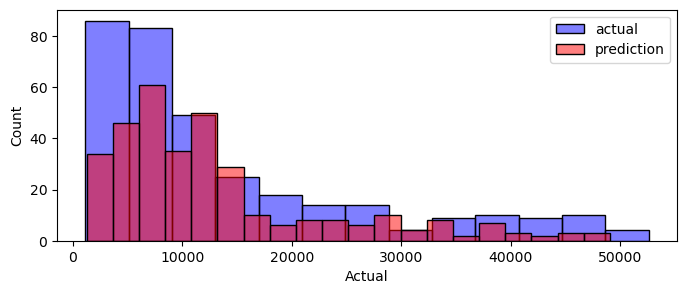

In [26]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [28]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_test_pred)

38205591.58517818

In [29]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions
1248,1633.9618,4211.890170,4211.890170
610,8547.6913,7948.160220,7948.160220
393,9290.1395,9336.827060,9336.827060
503,32548.3405,28879.012360,28879.012360
198,9644.2525,11251.539070,11251.539070
...,...,...,...
824,12523.6048,12574.637660,12574.637660
970,10702.6424,13872.595092,13872.595092
1327,9377.9047,13810.286066,13810.286066
793,21195.8180,25309.684294,25309.684294


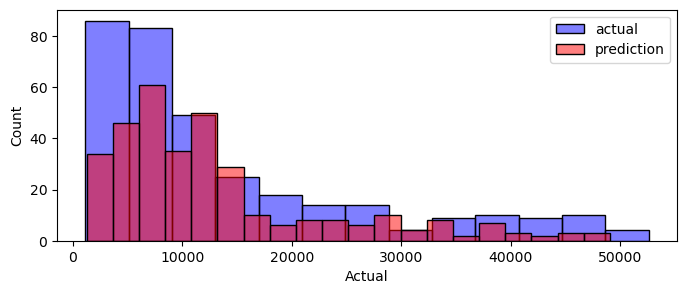

In [30]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [32]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

6181.067188210963

In [33]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions,Linear Regression Predictions
1248,1633.9618,4211.890170,4211.890170,4211.890170
610,8547.6913,7948.160220,7948.160220,7948.160220
393,9290.1395,9336.827060,9336.827060,9336.827060
503,32548.3405,28879.012360,28879.012360,28879.012360
198,9644.2525,11251.539070,11251.539070,11251.539070
...,...,...,...,...
824,12523.6048,12574.637660,12574.637660,12574.637660
970,10702.6424,13872.595092,13872.595092,13872.595092
1327,9377.9047,13810.286066,13810.286066,13810.286066
793,21195.8180,25309.684294,25309.684294,25309.684294


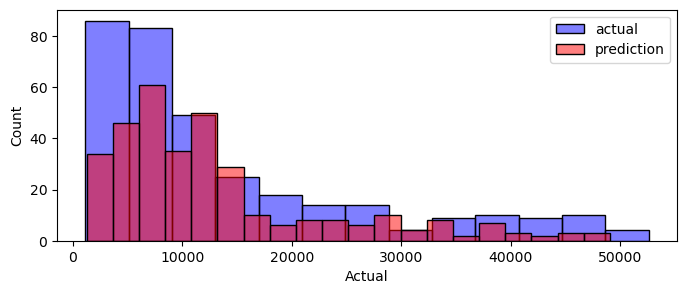

In [34]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

C:\ProgramData\Anaconda3_\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [36]:
y_test_pred = regressor.predict(X_test_transformed)

In [37]:
from sklearn import metrics
metrics.r2_score(y_test, y_test_pred)

0.8379307094747919

In [38]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions,Linear Regression Predictions,RF Regression Predictions
1248,1633.9618,4211.890170,4211.890170,4211.890170,2225.555229
610,8547.6913,7948.160220,7948.160220,7948.160220,10060.446758
393,9290.1395,9336.827060,9336.827060,9336.827060,9337.212058
503,32548.3405,28879.012360,28879.012360,28879.012360,34268.474766
198,9644.2525,11251.539070,11251.539070,11251.539070,10197.466437
...,...,...,...,...,...
824,12523.6048,12574.637660,12574.637660,12574.637660,13220.442214
970,10702.6424,13872.595092,13872.595092,13872.595092,10624.645466
1327,9377.9047,13810.286066,13810.286066,13810.286066,9440.580191
793,21195.8180,25309.684294,25309.684294,25309.684294,24237.846166


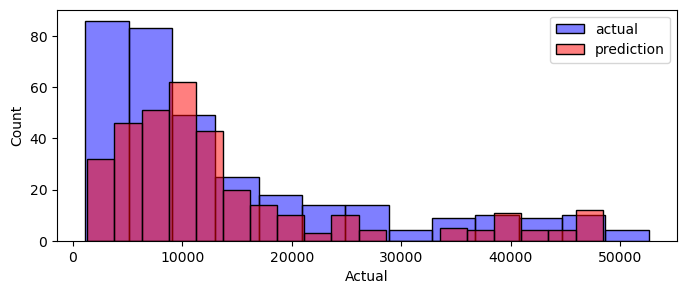

In [39]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Comparing all the Models

In [40]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()


,Model,Prediction
0,Actual,1633.9618
1,Actual,8547.6913
2,Actual,9290.1395
3,Actual,32548.3405
4,Actual,9644.2525


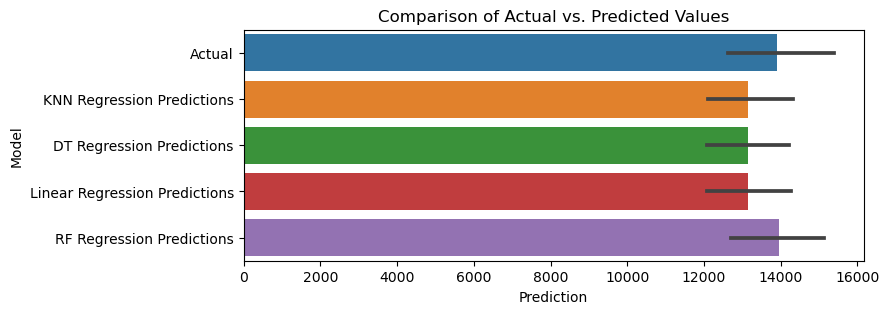

In [41]:
fig, ax = plt.subplots(figsize=(8,3))

sns.barplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

# Conclusion

# From the above comparison we can conclude that, the best algorithm for the Medical Cost  Prediction problem is : Random Forest Regression